Pose Tracking from mp4 with AlphaPose
==========================================================

This code extracts images from video then uses pre-trained Alpha Pose models to capture tracking data.


1 Load Packages
==========================================================

First let's import some necessary libraries:

In [2]:

%matplotlib inline
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_alpha_pose, heatmap_to_coord_alpha_pose
from ipywidgets import interact
import ffmpeg
import ipywidgets as widgets
import numpy as np
import subprocess
import pandas as pd
import cv2 as cv
from PIL import Image


2  Import Video and Cut into Images
-------------------------
Now bring in the video and figure out width and height

In [3]:

#Part A: Import Video

Dunk = ffmpeg.probe('Dunk.mp4')
video_info = next(s for s in Dunk['streams'] if s['codec_type'] == 'video')
width = int(video_info['width'])
height = int(video_info['height'])
num_frames = int(video_info['nb_frames'])
def get_length(input_video):
    result = subprocess.run(['ffprobe', '-v', 'error', '-show_entries', 'format=duration', '-of', 'default=noprint_wrappers=1:nokey=1', input_video], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    return float(result.stdout)
time = get_length('Dunk.mp4')

print('Width: ', width)
print('Height: ',height)
print('Frames: ',num_frames)
print('Time: ',time)

# Part B: Cut Video into Images.

#i = 0.1

#while i < time: 
#    string_in_string = "output{}.jpg".format(i)
#    (
#        ffmpeg
#        .input('Dunk.mp4', ss=i)
#        .filter('scale', width, -1)
#        .output(string_in_string, vframes=1)
#        .run()
#    )
#    i = i + 0.5



Width:  1280
Height:  720
Frames:  203
Time:  6.803


3 Find Court Locations, Run AlphaPose and Synthesize Locations
---------------------


C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


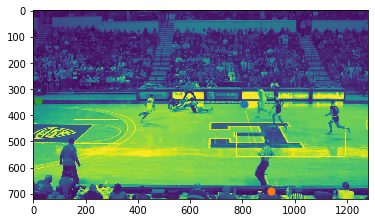

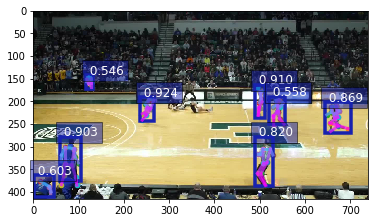

[[[240.52734  227.47266 ]
  [496.875    230.375   ]
  [ 61.847656 384.4414  ]
  [656.9219   266.57812 ]
  [511.65234  384.82422 ]
  [ 25.1875   371.14584 ]
  [554.0039   250.4336  ]
  [127.28125  174.96875 ]]]
[[[15.530821   68.35236   ]
  [30.91812    68.5074    ]
  [ 1.767246   44.11024   ]
  [39.867744   63.383816  ]
  [28.856829   45.097202  ]
  [-0.18713999 46.04326   ]
  [33.976334   65.595345  ]
  [ 9.7120495  76.05905   ]]]


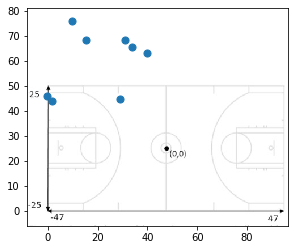

C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


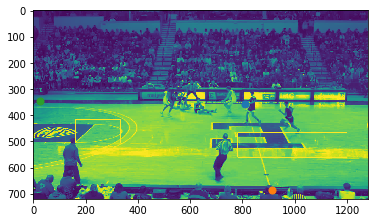

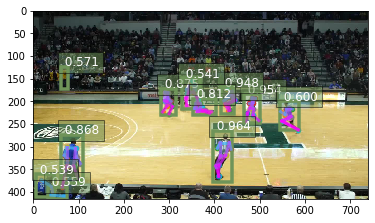

[[[410.03516  365.71484 ]
  [497.92188  242.26562 ]
  [431.0039   220.45703 ]
  [285.5664   223.45703 ]
  [ 63.73828  388.85547 ]
  [393.46875  223.34375 ]
  [584.7578   262.4297  ]
  [ 72.69922  170.89453 ]
  [ 66.70833  396.20834 ]
  [364.9961   207.3164  ]
  [ 31.609375 378.92188 ]]]
[[[22.780117  47.59839  ]
  [30.43364   66.54149  ]
  [26.81916   69.696434 ]
  [18.000462  68.90314  ]
  [ 1.4764707 43.28119  ]
  [24.502823  69.171036 ]
  [35.27943   63.682446 ]
  [ 6.181488  76.38727  ]
  [ 1.5148787 42.171963 ]
  [23.093868  71.53774  ]
  [-0.2691927 44.714405 ]]]


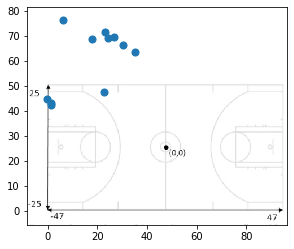

C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


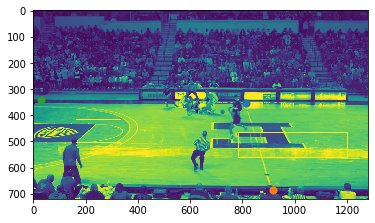

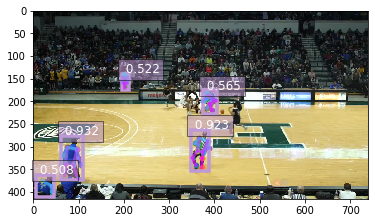

[[[ 64.34375  386.03125 ]
  [358.8086   341.5039  ]
  [394.58203  220.01953 ]
  [208.82422  171.63672 ]
  [ 41.171875 375.73438 ]]]
[[[ 1.3670812  43.552532  ]
  [19.95699    50.995693  ]
  [24.43358    69.51946   ]
  [14.167841   76.43211   ]
  [ 0.16794443 45.061707  ]]]


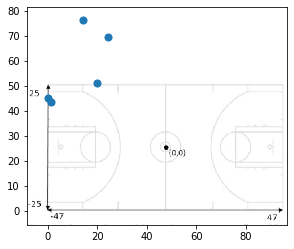

C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


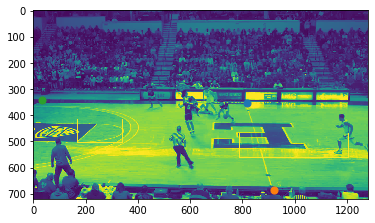

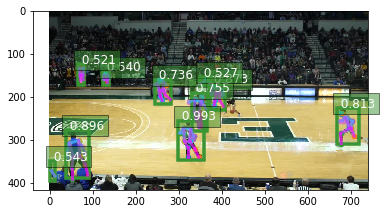

[[[320.59766  340.01172 ]
  [ 51.472656 389.70703 ]
  [403.6328   221.46094 ]
  [677.6992   308.04297 ]
  [347.94922  268.08984 ]
  [280.39453  205.46484 ]
  [  7.265625 360.51562 ]
  [136.72266  172.4961  ]
  [362.01562  160.60938 ]
  [ 78.16797  170.40234 ]]]
[[[17.363302  50.97001  ]
  [ 0.2011466 42.801254 ]
  [24.630947  69.15828  ]
  [39.486546  56.652367 ]
  [20.385416  61.950893 ]
  [17.512575  71.300064 ]
  [-1.9041071 47.129635 ]
  [ 9.487598  75.97073  ]
  [23.286732  78.298515 ]
  [ 6.000188  76.15251  ]]]


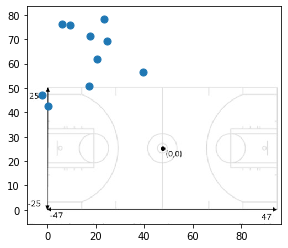

C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


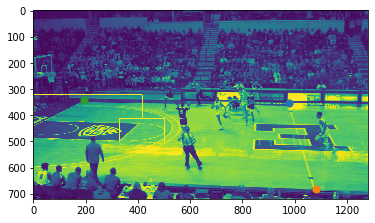

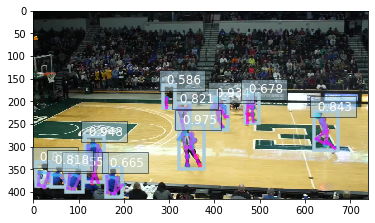

[[[340.5      341.5     ]
  [143.17578  380.20703 ]
  [428.69922  233.8086  ]
  [ 32.51172  345.13672 ]
  [ 99.33984  354.96484 ]
  [645.33203  294.41797 ]
  [333.25     266.875   ]
  [ 62.628906 350.96484 ]
  [486.8672   244.55469 ]
  [180.46875  413.76562 ]
  [316.51172  203.97266 ]]]
[[[ 8.856953  50.115    ]
  [-3.7698345 43.781033 ]
  [16.228168  66.66688  ]
  [-9.766212  48.847397 ]
  [-5.9282017 47.510807 ]
  [28.120216  57.970036 ]
  [ 9.846273  61.42582  ]
  [-8.063284  48.032692 ]
  [19.526937  65.17083  ]
  [-2.1645498 38.77367  ]
  [10.039988  70.93515  ]]]


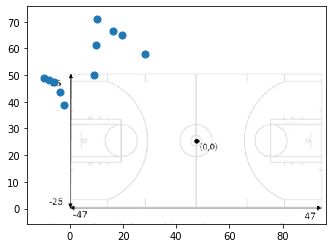

C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


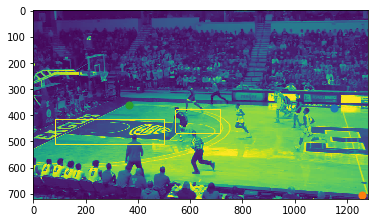

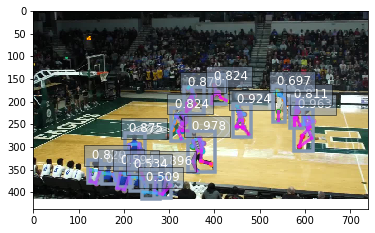

[[[360.57422 353.0039 ]
  [587.4922  299.6953 ]
  [476.16797 272.3789 ]
  [286.76953 355.01953]
  [202.46875 370.84375]
  [151.97266 375.19922]
  [338.46094 222.28906]
  [394.03516 204.11328]
  [327.04297 282.10547]
  [141.44531 338.8203 ]
  [589.3906  252.92188]
  [539.71094 239.66406]
  [212.41797 348.5039 ]
  [238.25    355.25   ]
  [261.43228 384.39062]]]
[[[ -0.23429489  51.198833  ]
  [ 14.454296    59.817997  ]
  [  8.269972    63.705826  ]
  [ -4.718918    50.721394  ]
  [-10.099718    48.123505  ]
  [-13.224911    47.345047  ]
  [  0.9315071   70.98924   ]
  [  4.6267166   73.87734   ]
  [ -0.89941025  61.88291   ]
  [-13.163898    52.8427    ]
  [ 15.462494    66.922356  ]
  [ 12.723072    68.8194    ]
  [ -9.073453    51.537685  ]
  [ -7.6462092   50.57368   ]
  [ -6.806547    46.204155  ]]]


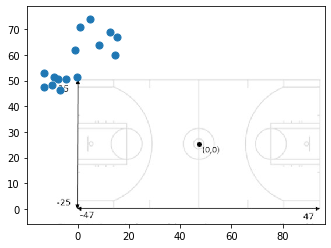

C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


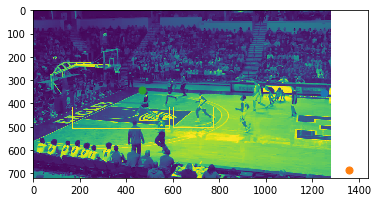

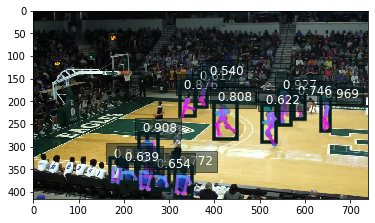

[[[644.14453 261.78516]
  [548.66016 244.28516]
  [248.10938 366.10938]
  [354.21094 216.71094]
  [189.45703 337.82422]
  [256.26562 344.73438]
  [444.46094 264.77344]
  [331.82422 412.73047]
  [590.9258  232.09766]
  [290.89453 358.53516]
  [208.83203 342.39453]
  [530.8594  292.45312]
  [377.54688 207.45312]
  [390.95703 173.69922]]]
[[[ 12.204342    62.587738  ]
  [  6.786642    65.02229   ]
  [-13.64702     45.831764  ]
  [ -4.400326    68.75613   ]
  [-16.639801    49.98902   ]
  [-12.747204    49.095318  ]
  [  0.11800003  61.670193  ]
  [ -9.494837    38.94944   ]
  [  9.565685    66.97049   ]
  [-10.924837    47.080894  ]
  [-15.559959    49.340286  ]
  [  4.7938156   57.669308  ]
  [ -2.8176212   70.21563   ]
  [ -1.3647404   75.370445  ]]]


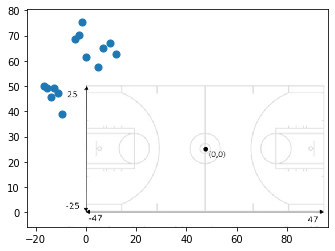

C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


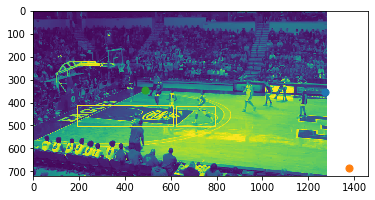

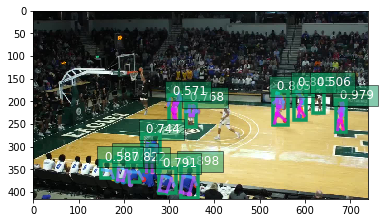

[[[672.2461  262.71484]
  [347.2422  355.7422 ]
  [202.04297 336.67578]
  [556.71484 241.95703]
  [586.625   233.125  ]
  [220.82031 348.52344]
  [307.53125 358.40625]
  [339.78125 257.40625]
  [245.32422 342.4414 ]
  [161.3802  347.99478]
  [314.0039  239.0586 ]
  [635.48047 219.64453]]]
[[[ 12.712845   62.769028 ]
  [ -8.643608   47.892887 ]
  [-17.026268   50.449707 ]
  [  6.149748   65.65152  ]
  [  8.120361   67.061676 ]
  [-16.1215     48.694923 ]
  [-11.086764   47.39623  ]
  [ -7.2138844  62.8024   ]
  [-14.529121   49.675076 ]
  [-19.692158   48.63707  ]
  [ -8.416127   65.52758  ]
  [ 11.321091   69.22144  ]]]


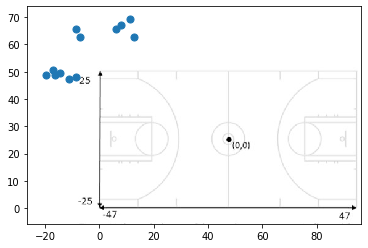

C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


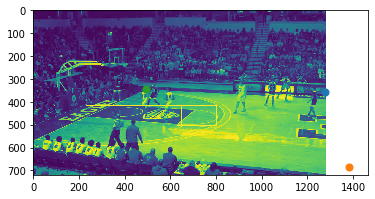

In [ ]:

LArci = cv.imread('LArc2.jpg',0)
LFTi = cv.imread('LFT2.jpg',0)
LBoxi = cv.imread('Lane.jpg',0)
Ei = cv.imread('E2.jpg',0)
method = eval('cv.TM_CCOEFF_NORMED')
court = cv.imread('court.jpg',0)

coords = []

#Part A: Load a Pre-Trained Model

#Get an Alpha Pose model trained with input images of size 256x192 on MS COCO dataset. 
#We pick the one using ResNet-101 V1b as the base model. 
#By specifying``pretrained=True``, it will automatically download the model from the model zoo if necessary.
# For more pretrained models, please refer to: doc:`../../model_zoo/index`.
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('alpha_pose_resnet101_v1b_coco', pretrained=True)
detector.reset_class(["person"], reuse_weights=['person'])


#Part B: Match image templates of court features to identify court locations

i = 0.1

while i < time:
#while i < 1:
# Read in each image and transform to necessary structure
    im_fname = "output{}.jpg".format(i)
    output = "outputa{}.jpg".format(i)
    orig = cv.imread(im_fname,0)
    img = orig

#Left FT Line (LFT)
    template = LFTi
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#    print(max_val)
    LFTval = max_val
    LFT = max_loc
    bottom_right = (LFT[0] + w, LFT[1] + h)
    cv.rectangle(img,LFT, bottom_right, 255, 2)
    plt.subplot(111),plt.imshow(orig)
#    plt.subplot(111),plt.imshow(orig,cmap = 'gray')    
    
    if(LFTval > 0.65):
        LFTx = LFT[0] + 3
        LFTy = LFT[1] + 92
        RFTx = LFT[0] + 75
        RFTy = LFT[1] + 17
        TCx = LFT[0] + 75 + 573
        TCy = LFT[1] + 17 -78
        BCx = LFT[0] + 75 + 678
        BCy = LFT[1] + 17 + 253
        BRx = LFT[0] + 75 - 211
        BRy = LFT[1] + 17 - 90
        
#    plt.scatter(top_left[0],top_left[1],s=50) 
#    plt.scatter(LFTx,LFTy,s=50) 
#    plt.scatter(RFTx,RFTy,s=50)
    
#LBox
    template = LBoxi
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#    print(max_val)
    LBoxval = max_val
    LBox = max_loc
    bottom_right = (LBox[0] + w, LBox[1] + h)
    cv.rectangle(img,LBox, bottom_right, 255, 2)
    plt.subplot(111),plt.imshow(orig)
#    plt.subplot(111),plt.imshow(orig,cmap = 'gray')  
    
    if(LBoxval > 0.443):
        LBx = LBox[0] + 38
        LBy = LBox[1] + 54
        RBx = LBox[0] + 142
        RBy = LBox[1] + 15
        
    else: 
        LBx = LFT[0] + (10-474) + 52
        LBy = LFT[1] + (78+27) - 20
        RBx = LFT[0] + (75-351) - 20
        RBy = LFT[1] + (20-26)+ 11
        
    if(LFTval < 0.65):
        LFTx = LBox[0] + (142+277)
        LFTy = LBox[1] + (7+90)
        RFTx = LBox[0] + (142+351)
        RFTy = LBox[1] + (7+26)
        TCx = RFTx + 573
        TCy = RFTy - 78
        BCx = RFTx + 678
        BCy = RFTy + 253
        BRx = RFTx - 211
        BRy = RFTy - 90

#    plt.scatter(LBx,LBy,s=50) 
#    plt.scatter(RBx,RBy,s=50) 
#    plt.scatter(LFTx,LFTy,s=50) 
#    plt.scatter(RFTx,RFTy,s=50)
    plt.scatter(TCx,TCy,s=50) 
    plt.scatter(BCx,BCy,s=50)
    plt.scatter(BRx,BRy,s=50)
    plt.show()
    
# Calculate Affine Transform:  
#    pts1 = np.float32([[RFTx, RFTy],[LFTx,LFTy],[RBx,RBy]])
#    pts2 = np.float32([[-28,6],[-28,-6],[-47,6]])
    pts1 = np.float32([[TCx, TCy],[BCx,BCy],[BRx,BRy]])
    pts2 = np.float32([[47,50],[47,0],[0,50]])
    m = cv.getAffineTransform(pts1,pts2)
    
# PART B: Run AlphaPose on each image 
    x, img = data.transforms.presets.yolo.load_test(im_fname)
    class_IDs, scores, bounding_boxs = detector(x)
    pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)
    predicted_heatmap = pose_net(pose_input)
    pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)
    ax = utils.viz.plot_keypoints(img, pred_coords, confidence, class_IDs, bounding_boxs, scores, box_thresh=0.5, keypoint_thresh=0.2)
    plt.show()
# Change coordinates to numpy array, transpose into x and y coordinates, and then change into a pandas dataframe
    num_coords = pred_coords.asnumpy()
#    x, y = num_coords.T
#    x = pd.DataFrame(x)
#    y = pd.DataFrame(y)
#    x = x.iloc[15]
#    y = y.iloc[15]  

# Transform AlphaPose coordinates into defined coordinate system    
#    src = np.array([ [[LBx, LBy]], [[RBx, RBy]]])
    src = np.array([num_coords[:,15]])
    print(src)
    dst = cv.transform(src,m)
    print(dst)

    ext = [-8.361, 96.486, -5.731, 51.663]
    plt.subplot(111),plt.imshow(court, zorder=0, extent=ext, cmap='Greys_r')
    x, y = dst.T
    plt.scatter(x,y,s=50, zorder=1)
    aspect=court.shape[0]/float(court.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))
    plt.gca().set_aspect(aspect)

    plt.show()

    i = i + 0.5    
    

In [8]:

#What are coordinates 15 (src)
#print([num_coords[:,15])
print(src)
print(type(src))


#Guy closest to FT line in frame 1
# x (L->R)  y (Up->Dn)
#240.52734  227.47266
#-39.31632   61.80465

#Guy #2
#127.28125  174.96875
#-47.91753   73.04157


#LFT in frame 1
# x (L->R)  y (Up->Dn)
#  166         496
#  -28         -8

#RFT in frame 1
# x (L->R)  y (Up->Dn)
#  231         438
#  -28         8

#Is changing the direction of positive what's throwing it off?


[[[410.03516  365.71484 ]
  [497.92188  242.26562 ]
  [431.0039   220.45703 ]
  [285.5664   223.45703 ]
  [ 63.73828  388.85547 ]
  [393.46875  223.34375 ]
  [584.7578   262.4297  ]
  [ 72.69922  170.89453 ]
  [ 66.70833  396.20834 ]
  [364.9961   207.3164  ]
  [ 31.609375 378.92188 ]]]
<class 'numpy.ndarray'>


In [ ]:

# Next steps for template matching:
# 1. Work on improving accuracy through the b/w process (try different courts)
# 2. Work on the logic for how to calculate which features, etc.
# 3. Incorporate additional templates (want 7 total) - use a weighted average for the estimated court positions?
# 4. Add the right side of the court


# Handy Functions:

# 0. B/W: To be used for future template matching accuracy improvements
#    output = "outputbw{}.jpg".format(i)
#    col = Image.open(im_fname)
#    gray = col.convert('L')
#    bw = gray.point(lambda x: 0 if x < 230 else 255, '1')
#    bw.save(output)
#    img = cv.imread(output,0)

# 1. print('Shape of pre-processed image:', x.shape)

# 2.  You can use this to check which points are what, change s for bigger points
#    plt.scatter(x,y,s=250) 

# 3. Save the figure to a new jpg
#    plt.savefig(output)  
    
# 4. Left Arc (LArc)
#    template = LArci
#    w, h = template.shape[::-1]
#    res = cv.matchTemplate(img,template,method)
#    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#    print(max_val)
#    LArcval = max_val
#    top_left = max_loc
#    bottom_right = (top_left[0] + w, top_left[1] + h)
#    cv.rectangle(img,top_left, bottom_right, 255, 2)
#    plt.subplot(122),plt.imshow(orig,cmap = 'gray') 
#    if(max_val > 0.575):
#        L3x = top_left[0] + 26
#        L3y = top_left[1] + 180
#        R3x = top_left[0] + 403
#        R3y = top_left[1] + 0
#        T3x = top_left[0] + 753
#        T3y = top_left[1] + 107
#    plt.scatter(top_left[0],top_left[1],s=50) 
#    plt.scatter(T3x,T3y,s=50) 
#    plt.scatter(L3x,L3y,s=50) 
#    plt.scatter(R3x,R3y,s=50) 

# 5. E
#    template = Ei
#    w, h = template.shape[::-1]
#    res = cv.matchTemplate(img,template,method)
#    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#    print(max_val)
#    Eval = max_val
#    top_left = max_loc
#    bottom_right = (top_left[0] + w, top_left[1] + h)
#    cv.rectangle(img,top_left, bottom_right, 255, 2)
#    plt.subplot(122),plt.imshow(orig,cmap = 'gray')
#    if(max_val > 0.4):
#        Cx = top_left[0]+168
#        Cy = top_left[1]+56
#    plt.scatter(top_left[0],top_left[1],s=50) 
#    plt.scatter(Cx,Cy,s=50) 

# 6. use: x = x.iloc[17]; y = y.iloc[17]; plt.scatter(x,y,s=500) to get overlay points points

# This is the COCO dataset
#iloc[0] is Nose
#iloc[1] is L eye
#iloc[2] is R eye
#iloc[3] is L ear
#iloc[4] is R ear
#iloc[5] is L shoulder
#iloc[6] is R shoulder
#iloc[7] is L elbow
#iloc[8] is R elbow
#iloc[9] is L wrist
#iloc[10] is R wrist
#iloc[11] is L hip
#iloc[12] is R hip
#iloc[13] is L knee
#iloc[14] is R knee
#iloc[15] is L ankle
#iloc[16] is R ankle

# 7. This will flip the axis to plot normally, but will screw it up if you plot it on the original image
#y = 416 - y

# 8. Write the frames back into a movie.
# I can't get this to work on my computer because Windows can't use pattern type glob
# https://github.com/kkroening/ffmpeg-python/issues/180

#try: (
#    ffmpeg
#    .input('*.jpg', pattern_type='glob', framerate=25)
#    .output('movie.mp4')
#    .run(capture_stdout=True, capture_stderr=True)
#)
  
#This will read out the stderr
#except ffmpeg.Error as e:
#    print('stdout:', e.stdout.decode('utf8'))
#    print('stderr:', e.stderr.decode('utf8'))
#    raise e
